In [1]:
using Flux
using Flux: DataLoader, params
using CSV, DataFrames
using Statistics
using Random
using Plots
using Images
using MLDatasets


In [103]:
include("../src/vae.jl")
include("../src/data_preprocessing.jl")
using .vae
using .data_preprocessing

In [32]:
X_train, y_train, X_test, y_test  = data_preprocessing.load_and_preprocess_mnist()

(Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 1 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 1; 0 0 … 0 0], Float32[0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0], Bool[0 0 … 0 0; 0 0 … 0 0; … ; 0 0 … 0 0; 0 0 … 0 0])

In [104]:
encoder, decoder = vae.train_vae(X_train, size(X_train, 1), 256, 10, epochs=5, batchsize=32, β=1.0f0)

Epoch 1: Average Loss = 150.75504296875
Epoch 2: Average Loss = 127.93560967610676
Epoch 3: Average Loss = 121.35054225667318
Epoch 4: Average Loss = 117.84951703694661
Epoch 5: Average Loss = 115.80372787679036


(Main.vae.var"#encoder#1"{Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(identity), Matrix{Float32}, Vector{Float32}}, Dense{typeof(tanh), Matrix{Float32}, Vector{Float32}}}(Dense(256 => 10), Dense(256 => 10), Dense(784 => 256, tanh)), Chain(Dense(10 => 256, tanh), Dense(256 => 784)))

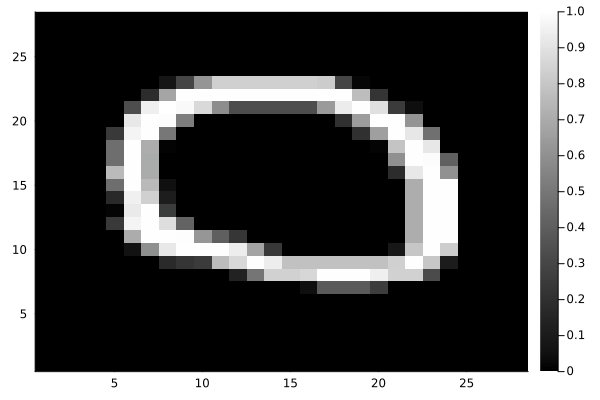

In [105]:
heatmap(reshape(X_test[:, 11], (28, 28)), color = :greys)

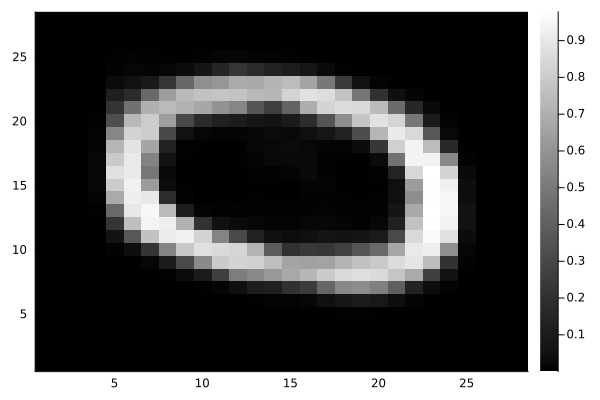

In [106]:
_, _, x̂ = sigmoid.(vae.reconstruct(encoder, decoder, X_test[:, 11]))
x̂ = reshape(x̂, (28, 28))
heatmap(x̂, color = :greys)